# TW Hya and the X-ray surveyor

Images for a poster at the X-ray ruveyor workshop.

## Simulate line profiles for O VII and C V

In [127]:
import os
import numpy as np
from scipy import stats
from scipy.io import readsav
from scipy.ndimage import gaussian_filter
import matplotlib as mpl

import matplotlib.pyplot as plt

import astropy.units as u
import astropy.constants as c

import spectrum
%matplotlib inline

In [7]:
os.environ['XUVTOP'] = '/melkor/d1/guenther/downdata/CHIANTI/'
import chianti
import chianti.core

 found PyQt4 widgets
 using PyQt4 widgets


In [100]:
def sigma(lambda_0, m, T, v_turb=0.*u.m/u.s):
    return lambda_0 * (c.k_B * T / (m * c.c**2) - v_turb**2/c.c**2 )**0.5

# example: sigma(25*u.AA, 16.*c.u, 1e6 * u.K)

In [61]:
o7.Emiss['plotLabels']['yLabel']

'ergs cm^-3 s^-1'

In [104]:
def ion_spectrum(hyd, ion_str, ionmass, wvlRange):
    wave = np.arange(wvlRange[0], wvlRange[1], 0.0001)
    flux = np.zeros_like(wave)
    deltaz = np.diff(hyd[:, 0])
    for i in range(hyd.shape[0]-1):
        n_e = hyd[i, 2] * hyd[i, 6]
        ion = chianti.core.ion(ion_str, temperature=hyd[i, 4], eDensity= n_e, em=np.abs(deltaz) * n_e)
        ion.emiss()
        for e, w in zip(ion.Emiss['emiss'], ion.Emiss['wvl']):
            # Just to save time: only do line in interval
            if (w > wvlRange[0]) and (w < wvlRange[1]):
                # DopplerShift. Speeds in cm / s
                wd = w * (1 + hyd[i, 3] / 3e10)
                sig  = sigma(w * u.AA, ionmass, hyd[i, 4] * u.K).to(u.AA)
                flux += e * stats.norm.pdf(wave, wd, sig)
    return wave, flux 

In [106]:
# To save time: Throw out layers < 100 m thickness
hydro = readsav('/melkor/d1/guenther/projects/tt_results/large_grid/12_6.sav')
hyd = hydro['hydrodyn']
deltaz = np.abs(np.diff(hyd[:,0]))
indbig = deltaz > 1e5
hyd = hyd[indbig, :]

In [169]:
from astropy.visualization import astropy_mpl_style
mpl.rcParams.update(astropy_mpl_style) 
mpl.rcParams['axes.labelcolor'] = 'k'
mpl.rc('font', size=15)  # pass in the font dict as kwargs
mpl.rc('xtick', labelsize='large')
mpl.rc('ytick', labelsize='large')

def plot_resolved_line(spec, coronaflux, wrange, scale1, scale2):
    wave = spec[0]
    plt.plot(wave, spec[1] * scale1, 'k:', label='shock', lw=3)
    plt.plot(wave, coronaflux * scale2, 'k--', label='corona', lw=3)
    plt.xlim(wrange)

    totalflux = spec[1] * scale1 + coronaflux * scale2
    plt.plot(wave, totalflux, 'k', label='shock+corona', lw=3)
    # need filterwidth in units of bins
    for r in [1000, 5000, 10000]:
        # Usually the line is about in the middle of the plot region, so this should be fine.
        sig = np.mean(wrange) /  (r * 2.35) / np.mean(np.diff(wave))
        plt.plot(wave, gaussian_filter(totalflux, sig), label='R={0}'.format(r), alpha=.5, lw=8)
    plt.legend(loc='upper left')
    plt.gca().xaxis.get_major_formatter().set_useOffset(False)
    plt.ylabel('Flux [arbitrary units]')
    plt.xlabel(r'Wavelength [$\AA$]')
    return plt.gcf(), plt.gca()



In [166]:
o7spec = ion_spectrum(hyd, 'o_7', 16*u.u, [21.5, 22.3])

wave = o7spec[0]
coronaflux = np.zeros_like(wave)

o7ion = chianti.core.ion('o_7', temperature=2e6, eDensity=1e9, em=1e52)
o7ion.emiss()
for e, w in zip(o7ion.Emiss['emiss'], o7ion.Emiss['wvl']):
    coronaflux += e * stats.norm.pdf(wave, w, sigma(w * u.AA, 16 *u.u, 2e6*u.K).to(u.AA))


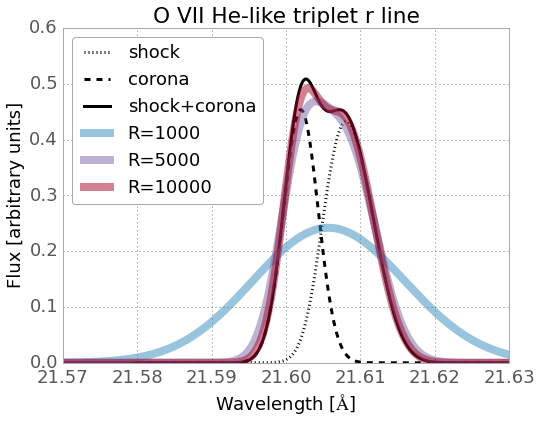

In [180]:
fig, ax = plot_resolved_line(o7spec, coronaflux, [21.57, 21.63], 1e4, 5e9)
ax.set_title('O VII He-like triplet r line')
fig.savefig('/melkor/d1/guenther/Dropbox/my_poster/15_Xraysurveyor/o7r.png', dpi=300)

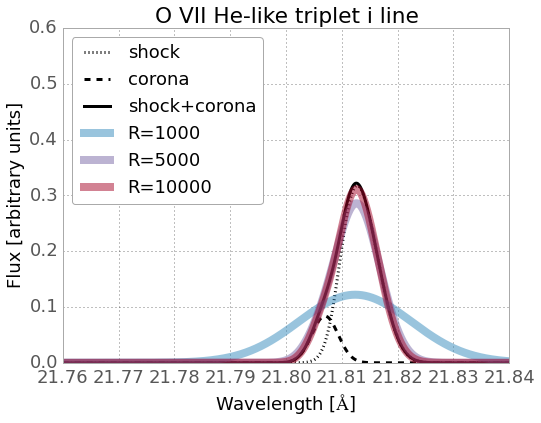

In [181]:
fig, ax = plot_resolved_line(o7spec, coronaflux, [21.76, 21.84], 1e4, 5e9)
ax.set_title('O VII He-like triplet i line')
fig.savefig('/melkor/d1/guenther/Dropbox/my_poster/15_Xraysurveyor/o7i.png', dpi=300)

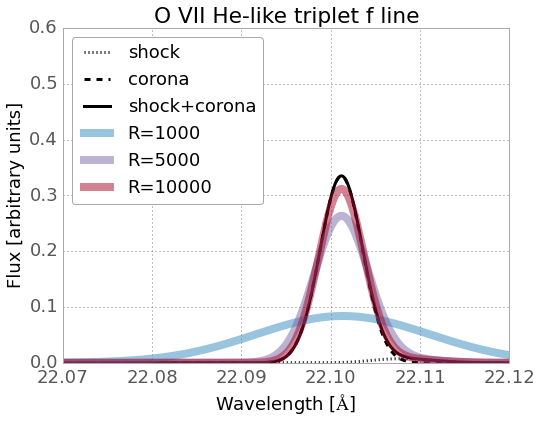

In [182]:
fig, ax = plot_resolved_line(o7spec, coronaflux, [22.07, 22.12], 1e4, 5e9)
ax.set_title('O VII He-like triplet f line')
fig.savefig('/melkor/d1/guenther/Dropbox/my_poster/15_Xraysurveyor/o7f.png', dpi=300)

In [111]:
ion = chianti.core.ion('o_7', temperature=1e6, eDensity=1e12, em=1e27)
ion.emiss()
ion.intensity()
ion.intensityList(wvlRange=[21.,23.])

   
 ------------------------------------------
   
  Ion  lvl1  lvl2                     lower - upper                           Wvl(A)    Intensity      A value Obs
  o_7     1     7                 1s2 1S0.0 - 1s.2p 1P1.0                    21.6020    1.494e+01     3.40e+12 Y
  o_7     1     5                 1s2 1S0.0 - 1s.2p 3P2.0                    21.8044    1.344e-01     3.33e+05 Y
  o_7     1     4                 1s2 1S0.0 - 1s.2p 3P1.0                    21.8070    1.581e+01     4.08e+08 Y
  o_7     1     2                 1s2 1S0.0 - 1s.2s 3S1.0                    22.1012    1.777e+00     1.06e+03 Y
   
 ------------------------------------------
   


In [178]:
c6spec = ion_spectrum(hyd, 'c_6', 12*u.u, [28, 29.])

c6wave = c6spec[0]
c6coronaflux = np.zeros_like(c6wave)

c6ion = chianti.core.ion('c_6', temperature=1e7, eDensity=1e9, em=1e52)
c6ion.emiss()
for e, w in zip(c6ion.Emiss['emiss'], c6ion.Emiss['wvl']):
    c6coronaflux += e * stats.norm.pdf(c6wave, w, sigma(w * u.AA, 12 *u.u, 1e7*u.K).to(u.AA))


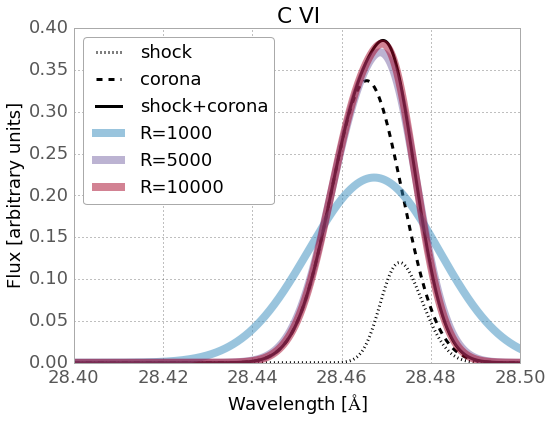

In [179]:
fig, ax = plot_resolved_line(c6spec, c6coronaflux, [28.4, 28.5], 1e4, 5e9)
ax.set_title('O VII He-like triplet f line')

ax.set_title('C VI')